# Number of International Visitors to London

## INTRODUCTION 

### Data Source 
    https://data.london.gov.uk/dataset/number-international-visitors-london

### Download the data set here 

#### Note: Since there are two files on the above mentioned source, I specifically referred to the below data link to download. <br>(It is the raw file that I am looking at)

    https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv 

###  The csv has information of international visitors to London. It includes 11 features (columns) such as 'year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area', 'visits', 'spend', 'nights', 'sample' 

> The Data is as follows: 
- year     - year in which they arrived
- quarter  - quarter of the year that they have arrived
- market   - which market they belong to
- dur_stay - Duration of their stay
- mode     - Mode of transport (Air, Tunnel, Sea)
- Purpose  - Purpose of the visit (holiday, business, etc)
- area     - To which area they flew (London)
- visits   - # of visits
- spend    - Spent money(Scaled Euros)
- nights   - # of nights over the course of # of visits
- sample   

### Questions on the data: 

#### 1. Who are the frequent travellers to London ? From which country ? 
#### 2. Which country people are most likely to spend more money ?
#### 3. What is the most used mode of transport ?
#### 4. In which quarter of the year they are more travels ? And what kind of purpose are they serving ?


### Answers retrieved from the data:

#### 1. Who are the frequent travellers to London ? From which country ?
####  - The frequent travellers from London are from USA, France, Germany and Australia. If we look at specifics, people coming for a holiday to London are mostly from Australia, followed by USA and France. Whereas people coming to visit friends/family are mostly from France followed by Netherlands and Germany (Most likely since they are all neighbouring countries), <br> people coming to London on a purpose of Business are high from USA, followed by France.

#### 2. Which country people are most likely to spend more money ?
####  - USA, Followed by France and Germany. Plots depict that.

#### 3. What is the most used mode of transport ?
####   - Air undoubtedly, plots below depict that results

#### 4. In which quarter of the year they are more travels ? And what kind of purpose are they serving in that quarter?
####  - Quarter 3 more number of travels, serving the purpose of holiday the most, followed by Business



In [1]:
# Few methods like countplot, catplot are in 0.9.0
# So I have installed this latest version

!pip install seaborn==0.9.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
My_Data = pd.read_csv ("international-visitors-london-raw.csv")

## Understanding the Data

#### Shape of the Data

In [4]:
My_Data.shape

(56899, 11)

#### Columns in the data

In [5]:
My_Data.columns

Index(['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area',
       'visits', 'spend', 'nights', 'sample'],
      dtype='object')

#### We can drop off the area column since all the entries are to London and it is constant in every record

In [6]:
columns = My_Data.columns
# Dropping Categorical columns
drop_cols = ['area']
cols = [item for item in columns if item not in drop_cols]
My_Data = My_Data[cols]

Looking at the head to observe how the data looks

In [7]:
My_Data.head(3)

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,sample
0,2002,Q1,Belgium,1-3 nights,Air,Holiday,3.572186,0.969138,6.954456,5
1,2002,Q1,Belgium,1-3 nights,Air,Business,9.284226,2.399577,12.604959,19
2,2002,Q1,Belgium,1-3 nights,Air,VFR,0.877182,0.089833,2.153128,3


#### Check if there is any missing data in the file

In [8]:
My_Data.count()

year        56899
quarter     56899
market      56899
dur_stay    56899
mode        56899
purpose     56899
visits      56899
spend       56899
nights      56899
sample      56899
dtype: int64

Looking at the result above we can say that no column has missing data

#### Now let us understand the type of each column

In [9]:
My_Data.dtypes

year          int64
quarter      object
market       object
dur_stay     object
mode         object
purpose      object
visits      float64
spend       float64
nights      float64
sample        int64
dtype: object

### Data Inconsistences

>  There is no missing entry in the data. The problem here is that one of the column has no explanation ('Sample' - it is hard to guess what that column means?)<br> <br> There is one more problem with the data 'visits' column has float values (Is that not supposed to be an int value? It says how many number of visits, is that intuitive? Similary nights.)<br> <br>
Year type is int, I would like to see it as a categorical variable (object type) in this problem

###  Data Cleaning (Dealing with the Data Inconsistences) 
>  It is understood that each record gives us the type of visit, and how many number of visits of that kind are observed and how many nights are being spent by all the travellers of a particular type of visit.
<br><br>
So intuitively the columns 'visits', 'nights' are in million and are to be multiplied by million. Units of Spend is in billion.

In [10]:
My_Data['visits'] = My_Data['visits'].multiply(1000000)
My_Data['visits'] = My_Data['visits'].astype(int)
My_Data['nights'] = My_Data['nights'].multiply(1000000)
My_Data['nights'] = My_Data['nights'].astype(int)
My_Data['spend'] = My_Data['spend'].multiply(1000000000)
My_Data['year'] = My_Data['year'].astype(object)

In [11]:
My_Data.head(3)

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,sample
0,2002,Q1,Belgium,1-3 nights,Air,Holiday,3572185,9.691384e+08,6954456,5
1,2002,Q1,Belgium,1-3 nights,Air,Business,9284225,2.399577e+09,12604959,19
2,2002,Q1,Belgium,1-3 nights,Air,VFR,877182,8.983310e+07,2153127,3


### 'label' function definition:
This function takes a plot as an argument and computes the label that has to be displayed<br> on each bar of the plot.

In [12]:
def label (plot):
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
    

# Plots

In [13]:
sns.set(style="ticks", color_codes=True)

The below plot is to understand how many entries are there for each Quarter ?

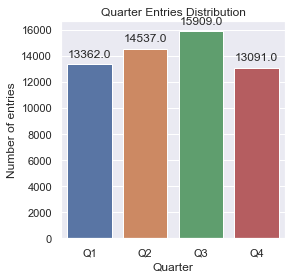

In [14]:
sns.set(rc={'figure.figsize':(4,4)})
plot = sns.countplot(x='quarter', data = My_Data)
plot.set_title('Quarter Entries Distribution')
plot.set_xlabel('Quarter')
plot.set_ylabel('Number of entries')
label(plot)

Q3 has more

#### Let us see in each quarter how many visits are recorded?

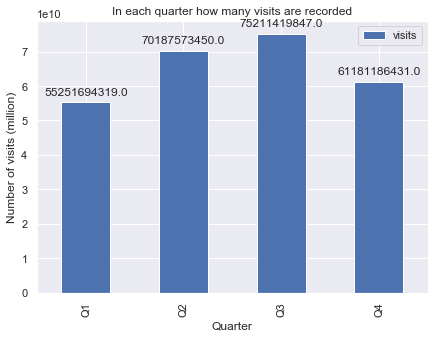

In [15]:
sns.set(rc={'figure.figsize':(7,5)})
plot = My_Data.groupby('quarter').sum().plot(y='visits', kind='bar')
plot.set_title('In each quarter how many visits are recorded')
plot.set_xlabel('Quarter')
plot.set_ylabel('Number of visits (million)')
label(plot)

Q3 has more

#### Let us see, in each quarter how many nights visitors have spent?

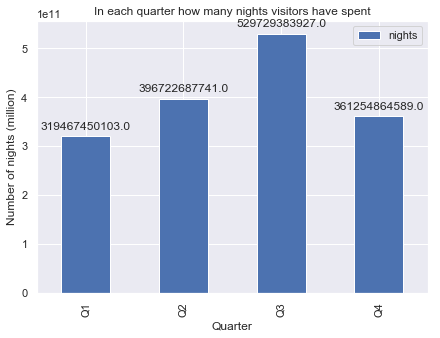

In [16]:
#sns.set(rc={'figure.figsize':(6,6)})
plot = My_Data.groupby('quarter').sum().plot(y='nights', kind='bar')
plot.set_title('In each quarter how many nights visitors have spent')
plot.set_xlabel('Quarter')
plot.set_ylabel('Number of nights (million)')
label(plot)

Q3 has more

#### Let us see, in each quarter how much money is spent?

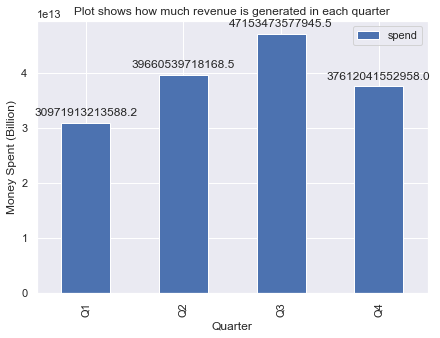

In [17]:
sns.set(rc={'figure.figsize':(7,5)})
plot = My_Data.groupby('quarter').sum().plot(y='spend', kind='bar')
plot.set_title('Plot shows how much revenue is generated in each quarter')
plot.set_xlabel('Quarter')
plot.set_ylabel('Money Spent (Billion)')
label(plot)

#### From the plots above we can infer that the Quarter 3 - (July - Spetember) is the busiest quarter
#### Therefore the revenue in this quarter is more when compared with others

#### Lets find out the most purpose served in each quarter

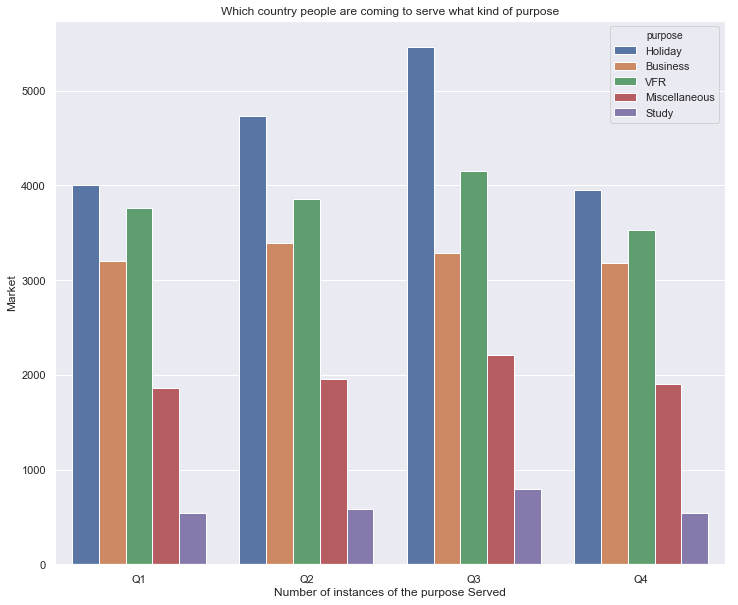

In [18]:
sns.set(rc={'figure.figsize':(12,10)})
plot = sns.countplot(x= "quarter", hue = "purpose", data = My_Data)
plot.set_title('Which country people are coming to serve what kind of purpose')
plot.set_xlabel('Number of instances of the purpose Served')
plot.set_ylabel('Market')

plt.show()

#### From the above plot people travel for holiday in the third quarter of the year more, followed by quarter - 2, whereas on the other hand people travelling on a business purpose almost have the same number of visits each quarter

####  Note: Answers for the question 4 are answered in above plot (Evidence)

#### Lets find out the most frequent mode of transport

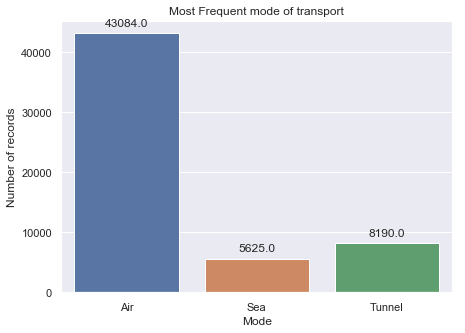

In [19]:
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.countplot(x='mode', data = My_Data)
plot.set_title('Most Frequent mode of transport')
plot.set_xlabel('Mode')
plot.set_ylabel('Number of records')
label(plot)

#### The above plots clearly depicts the most used mode of transport is 'Air'

####  Note: Answers for the question 3 are answered in above plot (Evidence)

####  Now lets find why people travel to London often 

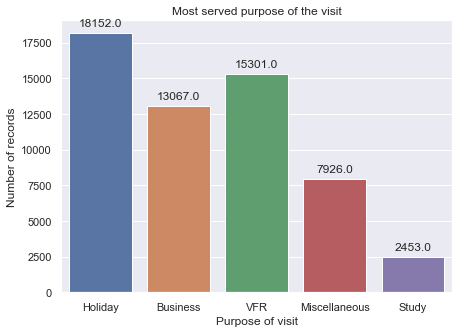

In [20]:
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.countplot(x='purpose', data = My_Data)
plot.set_title('Most served purpose of the visit')
plot.set_xlabel('Purpose of visit')
plot.set_ylabel('Number of records')
label(plot)

#### Interestingly most of the folks come to London to serve a Holiday, followed by VFR (Visit Friends/Relatives) and the least is to Study

####  Let us analyse how much amount people who come on a holiday spend

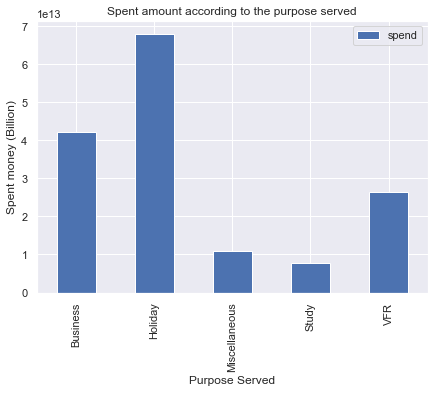

In [21]:
sns.set(rc={'figure.figsize':(7,5)})
plot = My_Data.groupby(['purpose']).sum().plot(y='spend', kind='bar')
plot.set_title('Spent amount according to the purpose served')
plot.set_xlabel('Purpose Served')
plot.set_ylabel('Spent money (Billion)')
plt.show()

#### People who have come to London on a Holiday are the ones who spent a lot and generated highest revenue, followed by people who have come on a business purpose

####  Lets try looking at the plot where each country's people come to London on what kind of purpose often


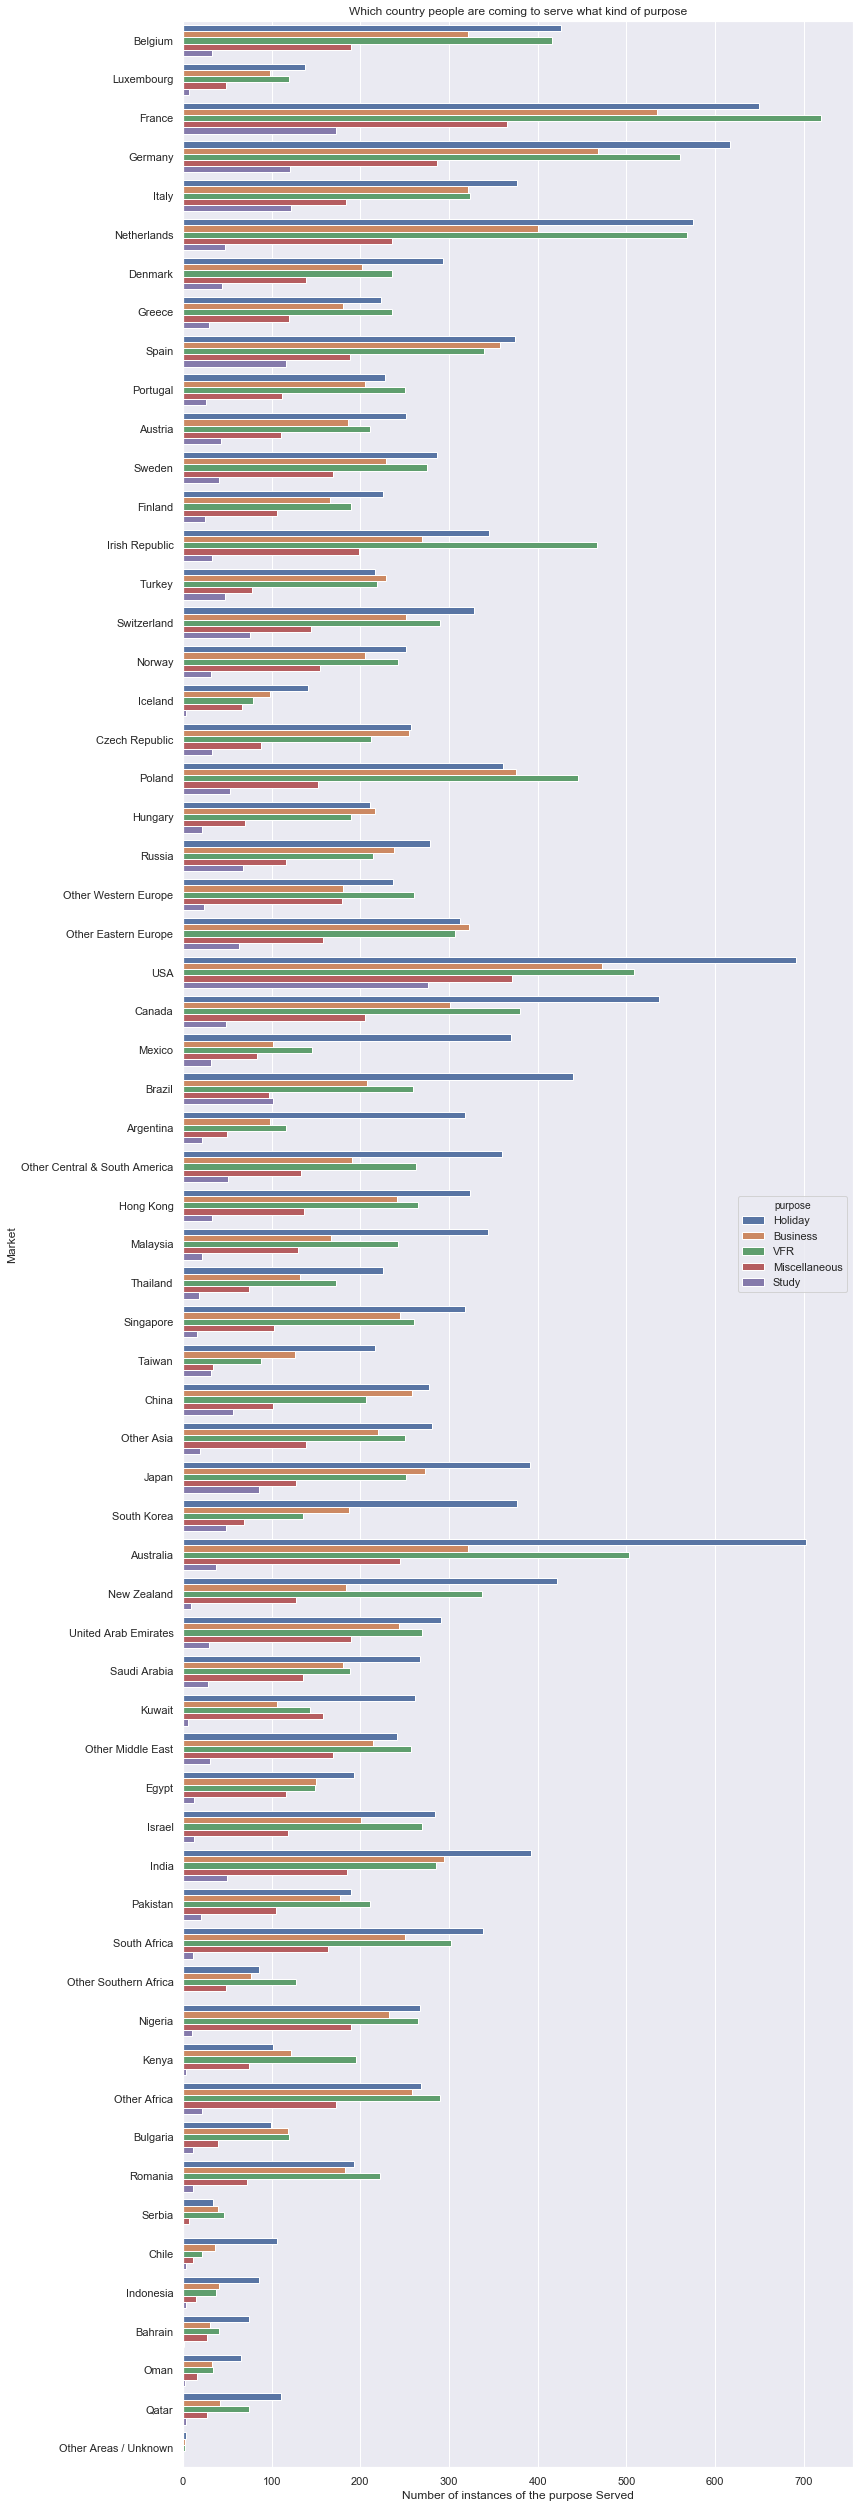

In [22]:
sns.set(rc={'figure.figsize':(12,45)})
plot = sns.countplot(y= "market", hue = "purpose", data = My_Data)
plot.set_title('Which country people are coming to serve what kind of purpose')
plot.set_xlabel('Number of instances of the purpose Served')
plot.set_ylabel('Market')

plt.show()

#### Above plot gives us a lot of information
#### The most number of visitors serving the purpose of a holiday are Australia, followed by USA
#### Whereas to serve the purpose of business, France stands first and USA stands next to it
#### France also leads with people coming in to Visit their Friends or Relatives

#### Note: Answers for the question 1 are answered in above plot (Evidence)


#### Now let us analyse which country folks spend a lot of money

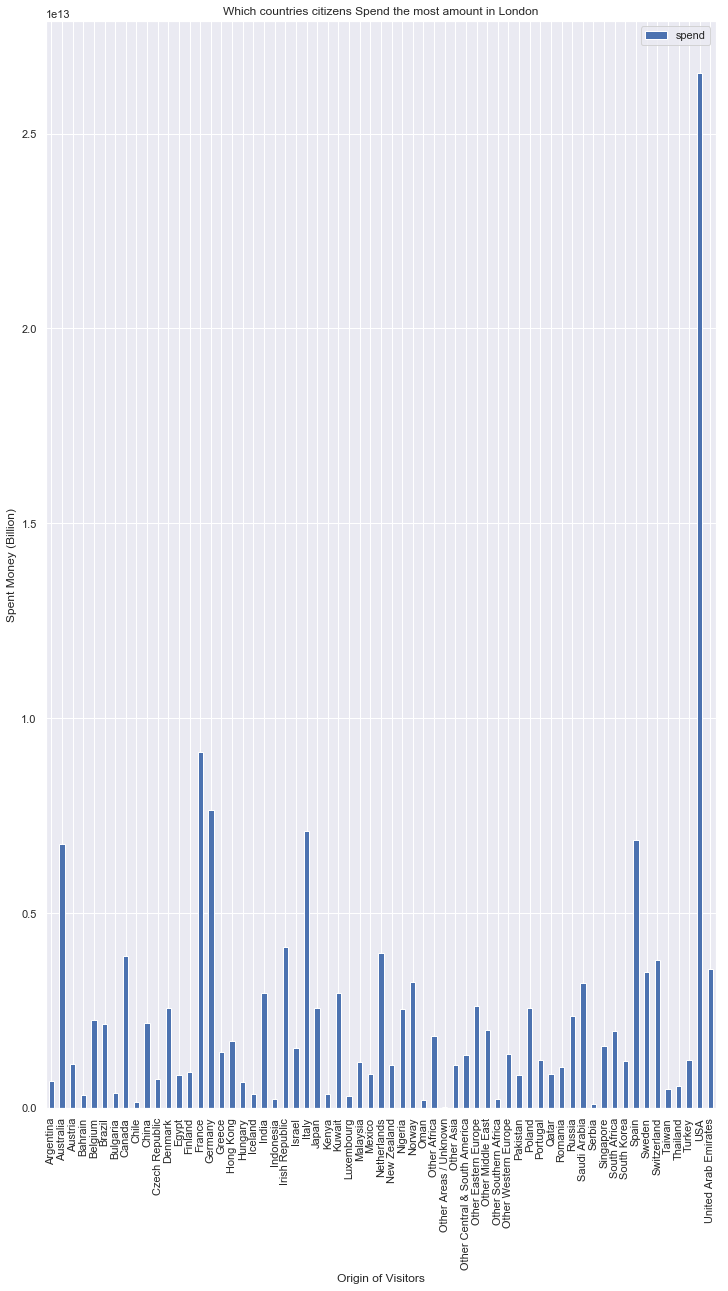

In [23]:
sns.set(rc={'figure.figsize':(12,20)})
plot = My_Data.groupby('market').sum().plot(y='spend', kind='bar')
plot.set_title('Which countries citizens Spend the most amount in London')
plot.set_xlabel('Origin of Visitors')
plot.set_ylabel('Spent Money (Billion)')
plt.show()

#### From the above plot it clearly says people from USA spend the highest amount, followed by France and Germany

#### Note: Answers for the question 2 are answered in above plot (Evidence)

### Data Cleaning Process

> ### Transformations
- First we had to deal with Understanding of the data and transform the columns by multiplying by million (visits, nights) and billion (spend)
> To compare the results between them we had to normalize the data. 
Below is the normalisation process

To deal with the data, visits in million, nights in million and Spend in billion, I chose to normalize the data.
<br>I have decided to Normalize the data using the formula<br>
<br>
Value = [(Value - Min) / (Max-Min)]
</font>

In [24]:
# Standardizing the visits
visits_std=(My_Data['visits']-My_Data['visits'].min())/(My_Data['visits'].max() - My_Data['visits'].min())
My_Data['visits'] = visits_std

# Standardizing the spend amount
spends_std=(My_Data['spend']-My_Data['spend'].min())/(My_Data['spend'].max() - My_Data['spend'].min())
My_Data['spend'] = spends_std

# Standardizing the nights
nights_std=(My_Data['nights']-My_Data['nights'].min())/(My_Data['nights'].max() - My_Data['nights'].min())
My_Data['nights'] = nights_std

In [25]:
My_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
visits,56899.0,0.029414,0.060171,0.0,0.004888,0.010633,0.025792,1.0
spend,56899.0,0.010814,0.024148,0.0,0.001199,0.003837,0.010743,1.0
nights,56899.0,0.020400,0.041025,0.0,0.002652,0.007188,0.019906,1.0
sample,56899.0,6.213501,13.546016,1.0,1.000000,2.000000,5.000000,299.0


Cleaned Data Characteristics:

> The data is normalised and if we look at the above description, we can identify that the outliers cannot skew our plot or effect our analysis. We have dealt with the outliers.

In [26]:
columns = My_Data.columns

# Dropping Categorical columns
drop_cols = ['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose']
cols_of_int = [item for item in columns if item not in drop_cols]
My_Data_int = My_Data[cols_of_int]

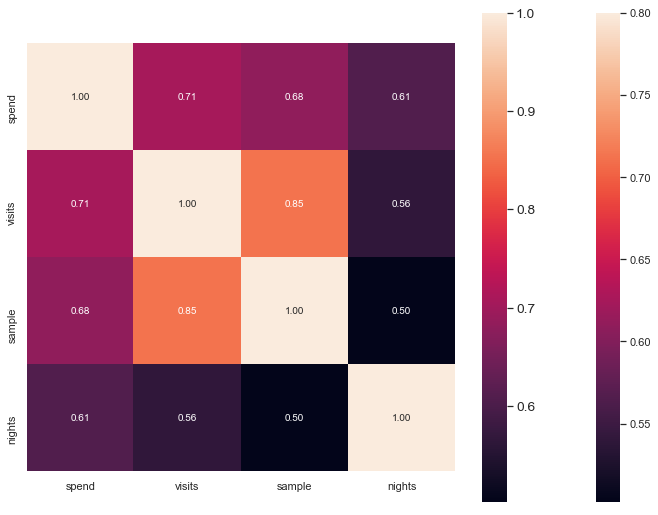

In [27]:
#correlation matrix
corrmat = My_Data_int.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
sns.set(rc={'figure.figsize':(6,6)})
#poly_inforce_qty correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'spend')['spend'].index
cm = np.corrcoef(My_Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### From the above Correlation plot we can say that Spend is strongly correlated with visits, nights, and sample. Likewise Sample is strongly correlated with visits

####  Patterns Observed
#### Inferences : 
   - Visits and Sample are strongly correlated
   - If we want to predict the spend the most variance would be explained by visits, followed by nights and sample

  > France, Netherlands and Germany being the neighbouring countries would have their friends/relatives more in London, So the most of the VFR purpose entries are from the above countries.

> USA, may it be holiday or Business, they spend a lot of money and would be great customers for any hotels/restaurants in London. Because they like to spend and they eventually generate most revenue.

> Quarter 3 has the highest international traffic in London when compared to other quarters. So the business people can target the customers more in this time and gain some profits. Most of them come for a holiday in Quarter 3, may be recreation centres could mint money if they have attractive offers.

> People spent more money during their holidays

### Primary Observation:

#### People from USA are the biggest customers for London, when compared with other Countries

### Lessons Learnt 

The main lessons that I have learnt during this project is :
1. USA will not misout from the top 10 in any revenue generating areas globally.
2. I have learned to plot the data pretty effectively and get understading from the plots.
3. Having the questions framed before and trying to trace out the answers from the data is fun. I have learnt a new approach on how to question the data.
4. Also had an opportunity to deal with the comparision of huge difference data - by normalisation
5. I feel, that I have improved in the story telling aspect looking at the plots and data.